In [1]:
from zipfile import *
#file_name = '/content/gdrive/My Drive/How3.zip'
file_name= 'How3.zip'
with ZipFile(file_name, 'r') as zipe:
    zipe.extractall()
    print('Done')

Done


In [1]:
import os 
from PIL import Image
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.image import imread
import  matplotlib.pyplot as plt
font = {
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (12,6)


**a) Download the original dataset (cut it in advance if necessary).**

- You need not less than 5 - 6 classes with not less than 1000 images for each of the classes in the training set,
- not less than 300 images for each of the classes in the validation set, and not less than 60 images for each of the classes in the test set.

**These numbers are approximate and you should follow the distribution ratio given below. Split the dataset into three subsets:**

- training, validation and a test set following the ratio (70% - 20% -10%).
- Use dataset analysis and preprocessing as normalization or standardization etc.
- Represent the classes in training and validation sets in the following two ways shown below for the training set.
- Do the same for the validation set. Do the same for the validation set.

**Make conclusions about the imbalance of the training and validation sets and pick-up the way to fix the imbalance problem of both datasets: training and validation.**

We downloaded the data from Kaggle. The data was a mix of colored and non colored images. We used a script to remove all the non color images and we splitted the data into the required ratios **(70% - 20% -10%).**


All the data was placed in a directory called FacialExpression. The FacialExpression directory contains 3 sub-directories:

- **train** folder contains (the training data)
- **test** folder contains (the testing data)
- **valid** contains (the validation data)

In [2]:
# this is the path to the parent data folder 
#FacialExpression='/content/How3/FacialExpression'
FacialExpression='How3/FacialExpression'

# print the sub-derectories
os.listdir(FacialExpression)

['valid', 'test', 'train']

The above list show all the 3 sub-directories. We created path variables to the tain, test and validatoin data.


In [3]:
train_path= FacialExpression+'/train'
test_path = FacialExpression+'/test'
valid_path= FacialExpression+'/valid'

# print the list of diffrent classes
print("Training Classes   : ",os.listdir(train_path))
print("Testing  Classes   : ",os.listdir(test_path))
print("Validation Classes : ",os.listdir(valid_path))

Training Classes   :  ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
Testing  Classes   :  ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
Validation Classes :  ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


We can see from the above results that that all the Training, Testing, Validation data have all the 7 classes.

In [4]:
labels=[]
numbers=[]

for fold in os.listdir(FacialExpression):
    print("_______________________________________________________")
    print("{:25.20}".format(" "),"{:50.50}".format(str(fold)))
    print("=======================================================")
    
    data=[]
    for cls in os.listdir(FacialExpression+"/"+fold):  
        num=len(os.listdir(FacialExpression+'/'+fold+"/"+cls))
        data.append(num)
        labels.append(cls)
        numbers.append(num)
        print(
                    "{:30.30}".format("The number of images for"),
                    "{:15.20}".format(str(cls)),
                    "{:4.30}".format(str(num)),
                )
    print('-------------------------------------------------------')
    print("The number of",fold," images is ",sum(data))

_______________________________________________________
                          valid                                             
The number of images for       happy           2720
The number of images for       sad             1104
The number of images for       fear            339 
The number of images for       surprise        720 
The number of images for       neutral         2928
The number of images for       angry           507 
The number of images for       disgust         320 
-------------------------------------------------------
The number of valid  images is  8638
_______________________________________________________
                          test                                              
The number of images for       happy           5459
The number of images for       sad             2177
The number of images for       fear            691 
The number of images for       surprise        1475
The number of images for       neutral         5858
The number of ima

The above output shows the total number images for train, test and validation data, as well as the number of samples per class.

Text(0.5, 1.0, ' Train, Test and validation ratios')

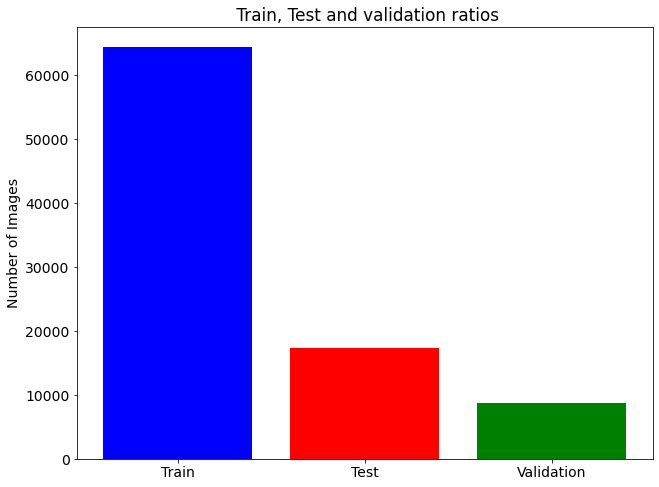

In [5]:
plt.rcParams["figure.figsize"] = (8,6)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar('Train', sum( numbers[14:]), color = 'b', )
ax.bar("Test", sum( numbers[7:14]), color = 'r', )
ax.bar("Validation", sum(numbers[0:7]), color = 'g', )
plt.xlabel("")
plt.ylabel("Number of Images")
plt.title(" Train, Test and validation ratios")

The above bar plot shows the proportions of the train, test and validation data.


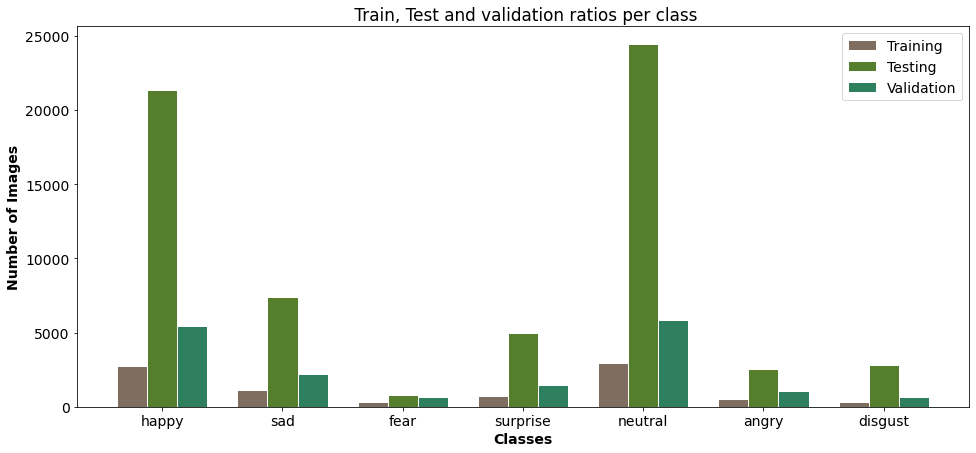

In [6]:
plt.rcParams["figure.figsize"] = (16,7)
barWidth = 0.25
 
# set height of bar
bars1 = numbers[0:7]
bars2 = numbers[14:]
bars3 = numbers[7:14]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Training')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Testing')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Validation')
 
# Add xticks on the middle of the group bars
plt.xlabel('Classes', fontweight='bold')
plt.ylabel("Number of Images", fontweight='bold')
plt.title(" Train, Test and validation ratios per class")
plt.xticks([r + barWidth for r in range(len(bars1))], labels[0:7])
 
# Create legend & Show graphic
plt.legend()
plt.show()

# here we display an image

Here we can see the number of training, testing and validation data for everyone one of the seven classes in our data set.

In [7]:
image_shape=imread(train_path+'/happy/'+os.listdir(train_path+'/happy')[1]).shape


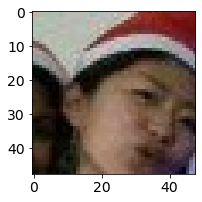

In [8]:
plt.rcParams["figure.figsize"] = (3,3)

plt.imshow(imread(train_path+'/happy/'+os.listdir(train_path+'/happy')[0]))
plt.show()

**b) Use Sequential model and build the topology of your CNN implementing unbalanced dataset as well the balanced training and validation datasets.**

- Your CNN topology should include not less than four
**b) Use Sequential model and build the topology of your CNN implementing unbalanced dataset as well the balanced training and validation datasets.**

- Your CNN topology should include not less than four

convolutional layers, where the number of neurons, the number of filters and their size and the type of pooling layers and where to include the last one is up to you.

- **Do experiments with 3 different models** (the difference could be in the choice of **activation function** , **optimizer** , and **number of convolutional layers** , **batch size** or any combination of these, learning rate change, stride etc.).
- Include as a first choice **ReLU** , **Adam** and **batch size 32**.
- Do not forget **batch normalization** and **shuffling.**
- Describe each model.
- Apply **regularization** and **dropout** to the model to prevent overfitting if necessary.
convolutional layers, where the number of neurons, the number of filters and their size and the type of pooling layers and where to include the last one is up to you.

- **Do experiments with 3 different models** (the difference could be in the choice of **activation function** , **optimizer** , and **number of convolutional layers** , **batch size** or any combination of these, learning rate change, stride etc.).
- Include as a first choice **ReLU** , **Adam** and **batch size 32**.
- Do not forget **batch normalization** and **shuffling.**
- Describe each model.
- Apply **regularization** and **dropout** to the model to prevent overfitting if necessary.

# **Model 1:  ReLU , Adam and batch size 32**

In [9]:
from tensorflow.keras.models import Sequential, load_model, Model
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import  Adam, Adadelta, RMSprop, Adadelta, Adamax, SGD

#normalization 
image_gen =ImageDataGenerator(rescale=1.0/255.0)

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(7, activation="softmax"))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 45, 45, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          65600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

# **Model Description**

**For model 1** , as per your recommendations, we used **ReLU** as the activation function , **Adam** as the optimize **r** and **batch size of 32**.

1. **Setting up the model.**

1. We set up a **convolution layer** as a base layer with:
  - **32** filters
  - A **3x3** kernael\_size
  - The default **stride** , stride =(1,1)
  - The default **padding**
  - And the **Relu** as the activation function
2. We add a **pooling layer** with
  - A **pool size** of (2,2)
3. We added three more c **onvolution layer** with:
  - **64** filters,
  - And same setting as the **base layer**
4. We added two more **pooling layer** with:
  - A **pool size** of (2,2)
5. We then **flattened** the array of images
6. We added **Dense** layer with:
  - **512** neurons
  - And the **Relu** as the activation function
7. We added **Dense** layer with:
  - **128** neurons
  - And the **Relu** as the activation function
8. We added a **dropout** layer to prevent overfitting with:
  - **Dropout** = 0.5
9. We then added the final output layer with:
  - **7** neurons (we have 7 classes in our dataset)
  - And set the activation be **softmax**

Our **first model** consists of **4 convolutional** layers, **3 pooling** layers, a **dropou** t layer and and two **dense layers**

**B) We compiled with the following setting :**

1. We set the **loss** = **categorical\_crossentropy** because its a multiclass classification
2. We chose **adam** as the **optiazer**
3. And we specified an an **accuracy** metrics as an **additional metrics**

# **Training the Model**

### define the image shape and the batchsize

In [11]:

batch_size=32
image_shape

(48, 48, 3)

**To train our model** (feed the data to our model ) we used the **Image Data Generator** of tensorflow.keras.preprocessing.images object.


1. First
- We made an instance of the **ImageDataGenerator** and we set the rescale parameter to scale the data.
- image\_gen =ImageDataGenerator(rescale=1.0/255.0)
- This will **rescale** the images as we feed them into our model

2. second :

- We called the **flow\_from\_directory** method of the **ImageDataGenerator** object to generate Train, Test and validation data for our model.
- To generate the **training set** we set the hyperparameters of the **flow\_from\_directory** as follows:
  - **train\_path** , _ **The training set folder path** _
  - **target\_size** =image\_shape[:2], **The image dimensions**
  - **color\_mode** =&#39;rgb&#39;, **Specify the color mode**
  - **batch\_size=** 32, **Specified the bach size**
  - **class\_mode** =&#39;categorical&#39;, **for multiclass classification**
  - **shuffle** =True, **To shuffle the data as it is generated**

We generated the **test** and **validation** sets more or less the same way

In [12]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               shuffle=True)

Found 64260 images belonging to 7 classes.


In [13]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,shuffle=False)

Found 17356 images belonging to 7 classes.


In [14]:
valid_image_gen = image_gen.flow_from_directory(valid_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,shuffle=True)

Found 8638 images belonging to 7 classes.


## Adding an Early stopping Call back
here early stopping callcak to track the val_accuracy and stop training once it begins decreasing too much! This will prevent overfitting 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
early_stop = EarlyStopping(monitor='loss',patience=4)
callbacks=[early_stop]

In [34]:
model1 = model.fit_generator(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                               callbacks=[early_stop]
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2009/2009 [==============================] - 252s 125ms/step - loss: 0.3314 - accuracy: 0.3964 - val_loss: 0.3493 - val_accuracy: 0.4046
Epoch 2/50
2009/2009 [==============================] - 519s 258ms/step - loss: 0.2814 - accuracy: 0.5758 - val_loss: 0.3377 - val_accuracy: 0.4458
Epoch 3/50
2009/2009 [==============================] - 350s 174ms/step - loss: 0.2642 - accuracy: 0.6070 - val_loss: 0.3310 - val_accuracy: 0.4686
Epoch 4/50
2009/2009 [==============================] - 356s 177ms/step - loss: 0.2534 - accuracy: 0.6257 - val_loss: 0.3363 - val_accuracy: 0.4542
Epoch 5/50
2009/2009 [==============================] - 325s 162ms/step - loss: 0.2467 - accuracy: 0.6371 - val_loss: 0.3347 - val_accuracy: 0.4528
Epoch 6/50
2009/2009 [==============================] - 254s 126ms/step - loss: 0.2409 - accuracy: 0.6468 - val_loss: 0.3240 - val_accuracy: 0.4850
Epoch 7/50
2009/2009 [==============

In [38]:

model1_df=pd.DataFrame(model.history.history)
model1_df.to_csv('model1.csv')
model.save('model1.h5')

In [17]:

model1_df=pd.read_csv('model1.csv',index_col=0 )
model1 = load_model('model1.h5')


# **Model 2:  (Activation:Swish) , (Optimizer:SGD), (Batch Size:32)**

In [18]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='swish',))

model_2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='swish',))
model_2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='swish',))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='swish',))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())

model_2.add(Dense(256,activation='swish'))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(64,activation='swish'))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(7, activation="softmax"))



model_2.compile(optimizer = SGD(
    learning_rate=0.4, momentum=0.2, nesterov=True, name='SGD'),
    loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 45, 45, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 64)        32832     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        32800     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)         

In [23]:
model2 = model_2.fit_generator(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                               callbacks=[early_stop]
                             )



Epoch 1/50
2009/2009 [==============================] - 395s 197ms/step - loss: 0.3063 - accuracy: 0.5084 - val_loss: 0.3575 - val_accuracy: 0.4044
Epoch 2/50
2009/2009 [==============================] - 328s 163ms/step - loss: 0.2721 - accuracy: 0.5935 - val_loss: 0.3447 - val_accuracy: 0.4115
Epoch 3/50
2009/2009 [==============================] - 320s 159ms/step - loss: 0.2567 - accuracy: 0.6204 - val_loss: 0.3393 - val_accuracy: 0.4309
Epoch 4/50
2009/2009 [==============================] - 323s 161ms/step - loss: 0.2468 - accuracy: 0.6373 - val_loss: 0.3152 - val_accuracy: 0.4963
Epoch 5/50
2009/2009 [==============================] - 320s 159ms/step - loss: 0.2397 - accuracy: 0.6501 - val_loss: 0.3611 - val_accuracy: 0.4510
Epoch 6/50
2009/2009 [==============================] - 321s 160ms/step - loss: 0.2336 - accuracy: 0.6594 - val_loss: 0.3155 - val_accuracy: 0.5007
Epoch 7/50
2009/2009 [==============================] - 327s 163ms/step - loss: 0.2281 - accuracy: 0.6679 - val_

In [24]:

model2_df=pd.DataFrame(model2.history)
model2_df.to_csv('model2.csv')
model_2.save('model2.h5')

In [19]:

model2_df=pd.read_csv('model2.csv',index_col=0 )
model_2 = load_model('model2.h5') 


# **Model 3:  (Activation:Softplus) , (optimizer:AdaDelta), (batch size:48)**

In [20]:
model_3 = Sequential()

model_3.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='relu',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='softplus',))
model_3.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=image_shape, activation='softplus',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=image_shape, activation='softplus',))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())

model_3.add(Dense(512,activation='relu'))
model_3.add(Dense(256,activation='softplus'))
model_3.add(Dense(128,activation='softplus'))
model_3.add(Dense(128,activation='softplus'))
model_3.add(Dense(64,activation='softplus'))

model_3.add(Dropout(0.5))

model_3.add(Dense(7, activation="softmax"))



model_3.compile(optimizer = Adadelta(lr=1.5,rho=0.96,epsilon=1e-06), 
              loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 45, 45, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 19, 64)        32832     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 64)         

In [21]:
batch_size=48


In [27]:
model3 = model_3.fit_generator(train_image_gen,epochs=60,
                              validation_data=test_image_gen,
                               callbacks=[early_stop]
                             )

Epoch 1/60
2009/2009 [==============================] - 393s 196ms/step - loss: 0.3085 - accuracy: 0.5000 - val_loss: 0.3373 - val_accuracy: 0.4325
Epoch 2/60
2009/2009 [==============================] - 400s 199ms/step - loss: 0.2709 - accuracy: 0.5944 - val_loss: 0.3257 - val_accuracy: 0.4798
Epoch 3/60
2009/2009 [==============================] - 395s 197ms/step - loss: 0.2582 - accuracy: 0.6161 - val_loss: 0.3269 - val_accuracy: 0.4618
Epoch 4/60
2009/2009 [==============================] - 389s 194ms/step - loss: 0.2511 - accuracy: 0.6310 - val_loss: 0.3220 - val_accuracy: 0.4838
Epoch 5/60
2009/2009 [==============================] - 392s 195ms/step - loss: 0.2447 - accuracy: 0.6413 - val_loss: 0.3392 - val_accuracy: 0.4723
Epoch 6/60
2009/2009 [==============================] - 392s 195ms/step - loss: 0.2402 - accuracy: 0.6491 - val_loss: 0.3127 - val_accuracy: 0.5147
Epoch 7/60
2009/2009 [==============================] - 388s 193ms/step - loss: 0.2359 - accuracy: 0.6577 - val_

In [ ]:

model3_df=pd.DataFrame(model3.history)
model3_df.to_csv('model3.csv')
model_3.save('model3.h5')


In [22]:

model3_df=pd.read_csv('model3.csv',index_col=0 )
model_3 = load_model('model3.h5', custom_objects={'Adadelta': Adadelta}) 


### **C) Plot training and validation accuracy as well as training and validation loss for each of the above models using combinations like the one shown below.**

In [23]:
model1_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.331368  0.396359  0.349333      0.404586
1  0.281434  0.575801  0.337721      0.445782
2  0.264199  0.607049  0.330986      0.468599
3  0.253411  0.625739  0.336250      0.454195
4  0.246668  0.637099  0.334713      0.452812

In [24]:
model2_df.head()


loss  accuracy  val_loss  val_accuracy
0  0.306278  0.508388  0.357548      0.404356
1  0.272115  0.593495  0.344664      0.411500
2  0.256716  0.620417  0.339253      0.430860
3  0.246792  0.637348  0.315168      0.496255
4  0.239690  0.650093  0.361075      0.450968

In [25]:
model3_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.308461  0.499953  0.337311      0.432473
1  0.270936  0.594429  0.325681      0.479776
2  0.258248  0.616106  0.326911      0.461800
3  0.251082  0.631046  0.322009      0.483752
4  0.244679  0.641301  0.339195      0.472344

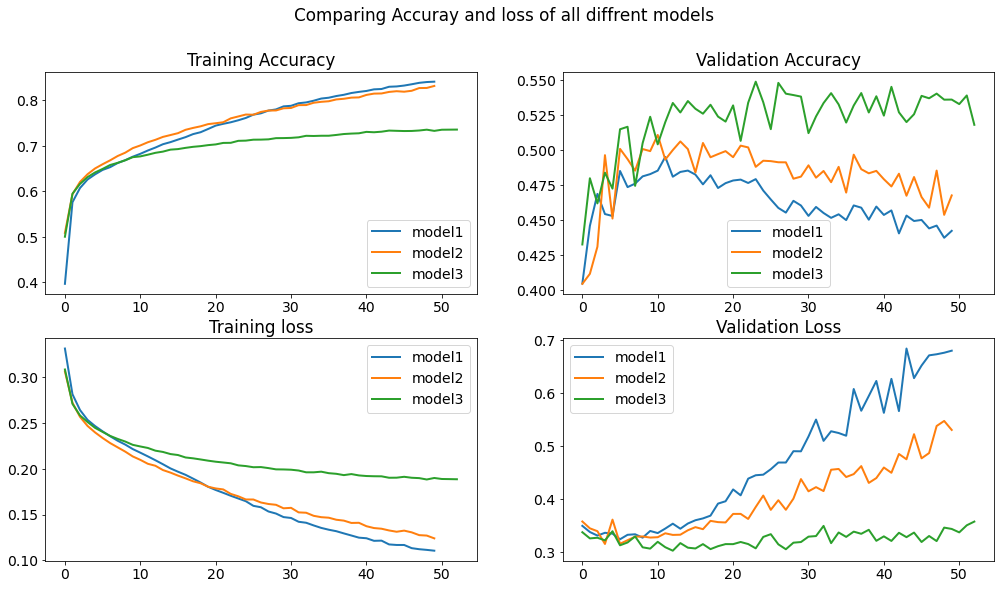

In [26]:
plt.rcParams["figure.figsize"] = (17,9)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

ax1.plot(model1_df.index, 'accuracy', data=model1_df,  markersize=12, linewidth=2, label="model1")
ax1.plot(model2_df.index, 'accuracy', data=model2_df,  markersize=12, linewidth=2, label="model2")
ax1.plot(model3_df.index, 'accuracy', data=model3_df,  markersize=12, linewidth=2, label="model3")

ax1.title.set_text('Training Accuracy')
ax1.legend()

# this the the secound subplot
ax2.plot(model1_df.index, 'val_accuracy', data=model1_df,  markersize=12, linewidth=2, label="model1")
ax2.plot(model2_df.index, 'val_accuracy', data=model2_df,  markersize=12, linewidth=2, label="model2")
ax2.plot(model3_df.index, 'val_accuracy', data=model3_df,  markersize=12, linewidth=2, label="model3")
ax2.title.set_text('Validation Accuracy')
ax2.legend()

# this the the secound subplot
ax3.plot(model1_df.index, 'loss', data=model1_df,  markersize=12, linewidth=2, label="model1")
ax3.plot(model2_df.index, 'loss', data=model2_df,  markersize=12, linewidth=2, label="model2")
ax3.plot(model3_df.index, 'loss', data=model3_df,  markersize=12, linewidth=2, label="model3")
ax3.title.set_text('Training loss')
ax3.legend()

# this the the secound subplot
ax4.plot(model1_df.index, 'val_loss', data=model1_df,  markersize=12, linewidth=2, label="model1")
ax4.plot(model2_df.index, 'val_loss', data=model2_df,  markersize=12, linewidth=2, label="model2")
ax4.plot(model3_df.index, 'val_loss', data=model3_df,  markersize=12, linewidth=2, label="model3")
ax4.title.set_text('Validation Loss')
ax4.legend()

fig.suptitle('Comparing Accuray and loss of all diffrent models')

plt.show()

### **D) Display some channels in every intermediate activations and explain why this is useful.**

In [27]:
plt.rcParams["figure.figsize"] = (4,4)
img_tensor=imread(test_path+'/happy/'+os.listdir(test_path+'/happy')[2])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/ 255.0
print(img_tensor.shape)


(1, 48, 48, 3)


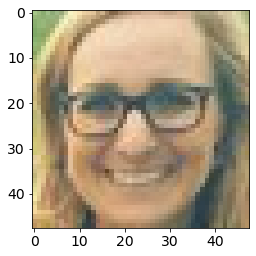

In [28]:
plt.imshow(img_tensor[0])
plt.show()

In [29]:
layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [30]:
activations = activation_model.predict(img_tensor)

In [31]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

            

(1, 45, 45, 32)


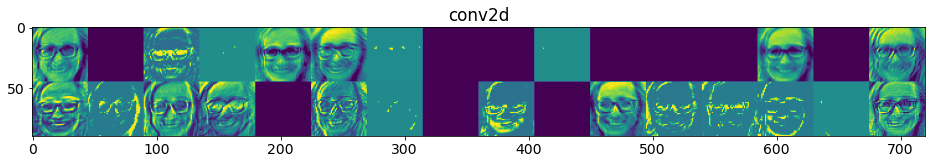

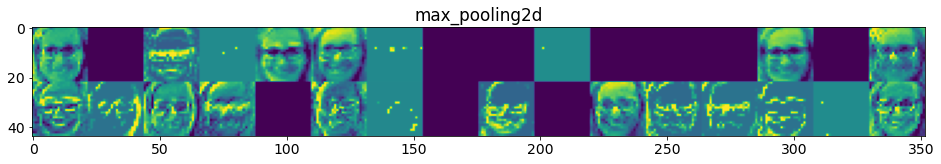

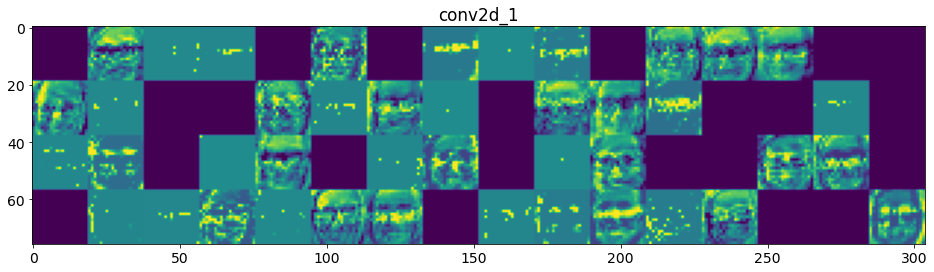

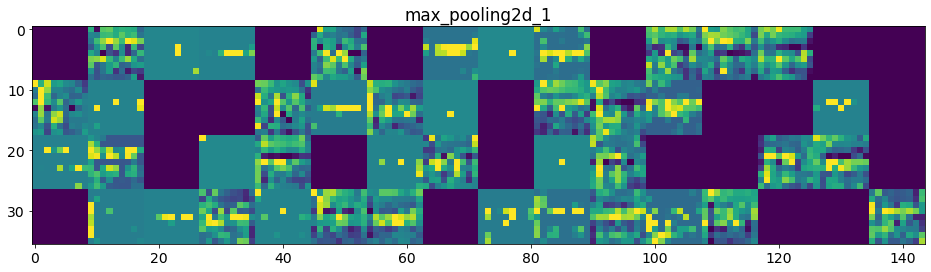

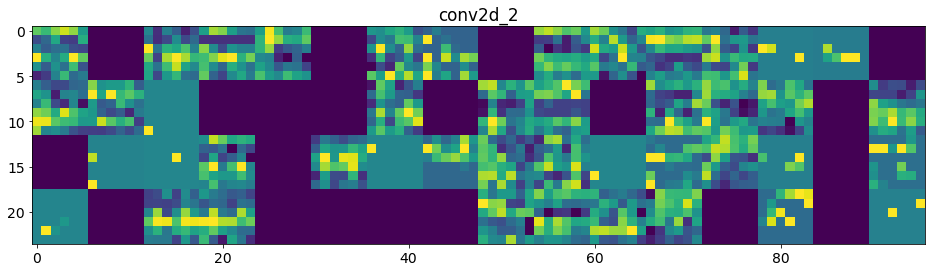

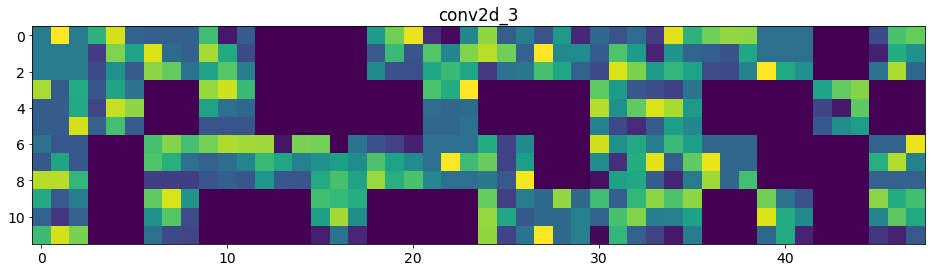

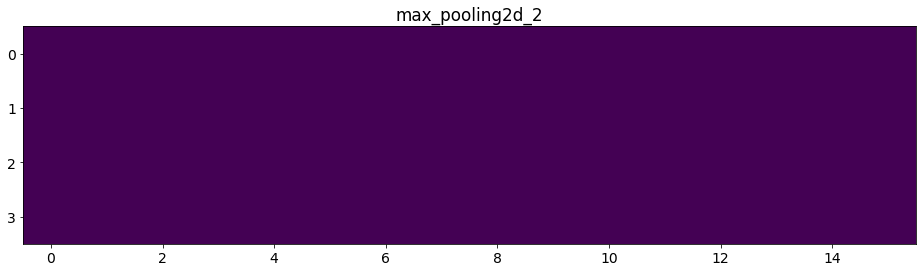

In [32]:
# names of the layers, so you can have them as a part of your plot
import sys
sys.tracebacklimit = 0
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)


images_per_row = 16



# displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    # number of features in the feature map
    n_features = layer_activation.shape[-1]

    # the feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # tiles the activtion channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
              channel_image = layer_activation[0, :, :, col * images_per_row + row ]
              
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(
                  channel_image, 0, 255).astype('uint8')
              # displays the grid
              display_grid[
                  col * size : (col + 1) * size,
                  row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
  
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



### **E) Visualize (display) convolutional filters: get the gradient of the loss with regard to the input, apply stochastic gradient descent, include a code for filter visualizations and generate a grid of some filter response patterns in a layer.**

In [33]:

import numpy as np
import tensorflow as tf

layer_name = 'conv2d_1'


filter_index = 0


def generate_pattern(layer_name, filter_index,size):
    epochs = 40

    submodel = tf.keras.models.Model([model1.inputs[0]], [model1.get_layer(layer_name).output])
    step_size = 1.

    # Initiate random noise
    input_img_data = np.random.random((1, size, size, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128.

    # Cast random noise from np.float64 to tf.float32 Variable
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))
    # Iterate gradient ascents
    for _ in range(epochs):
        with tf.GradientTape() as tape:
            outputs = submodel(input_img_data)
            loss_value = tf.reduce_mean(outputs[:, :, :, filter_index])
        grads = tape.gradient(loss_value, input_img_data)
        normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
        input_img_data.assign_add(normalized_grads * step_size)
    return input_img_data


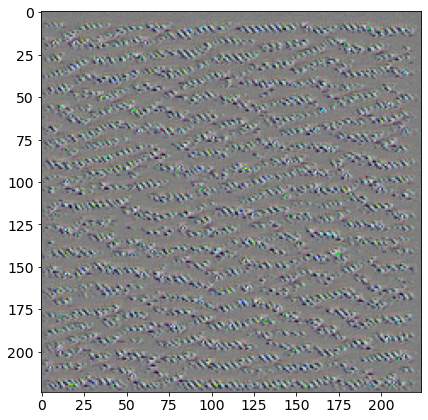

In [34]:
input_img_data=generate_pattern(layer_name, 0,size=224)
input_img_data = input_img_data.numpy().astype(np.uint8)
plt.figure(figsize=(7,7))
plt.imshow(input_img_data[0])
plt.show()

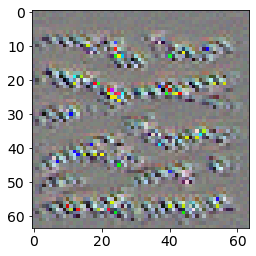

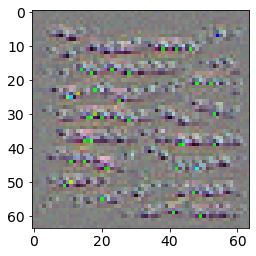

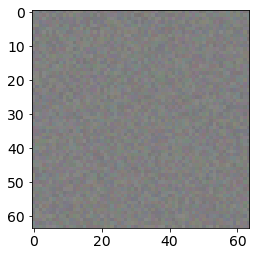

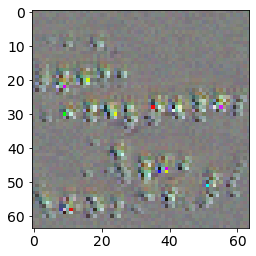

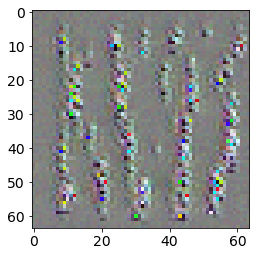

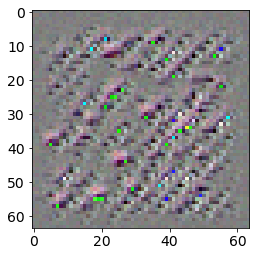

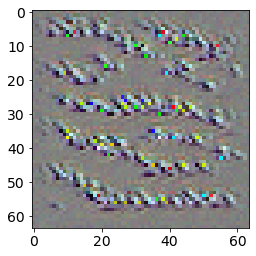

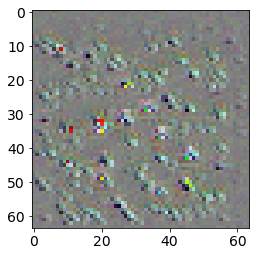

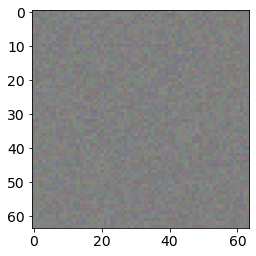

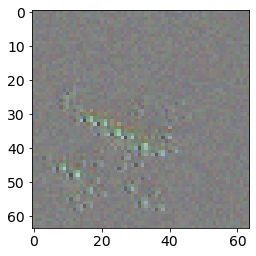

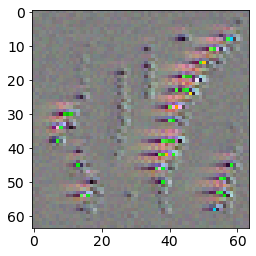

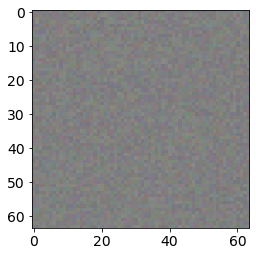

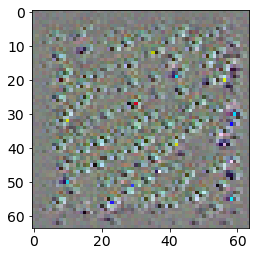

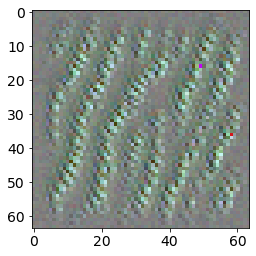

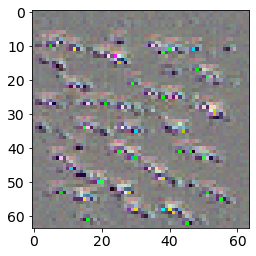

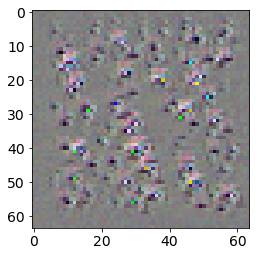

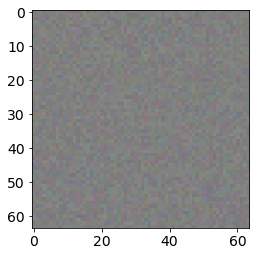

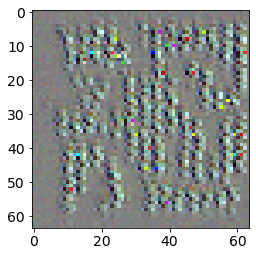

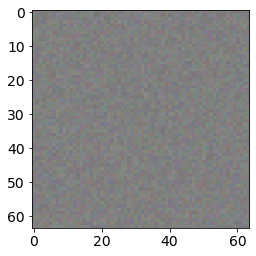

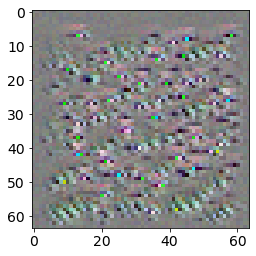

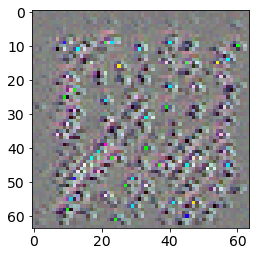

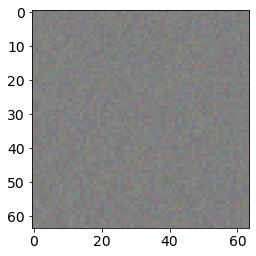

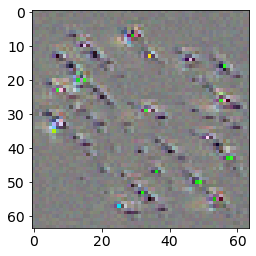

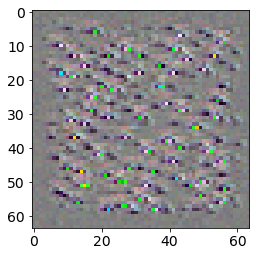

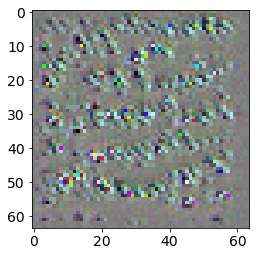

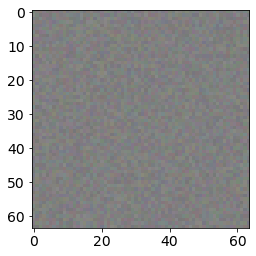

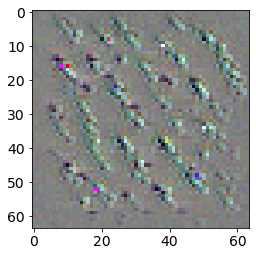

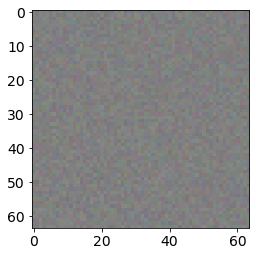

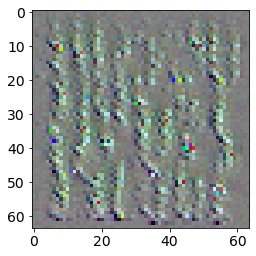

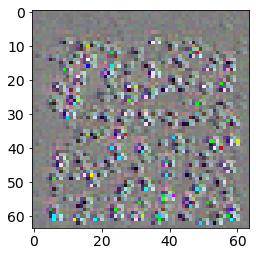

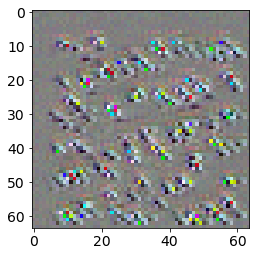

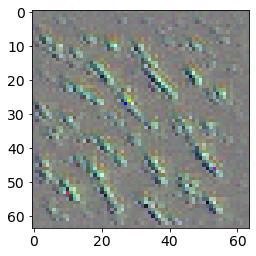

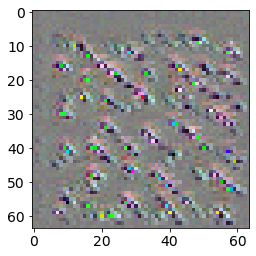

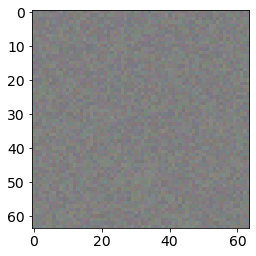

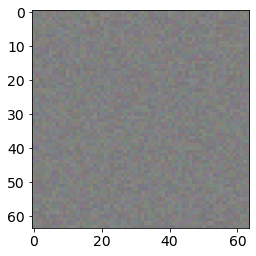

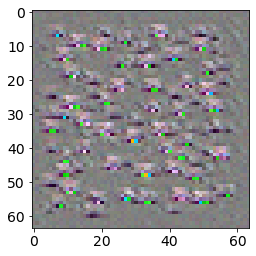

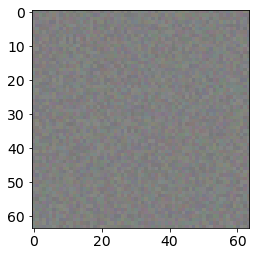

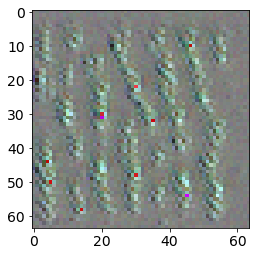

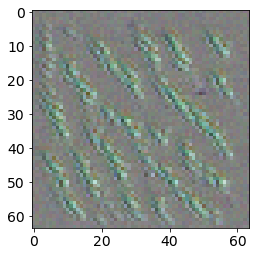

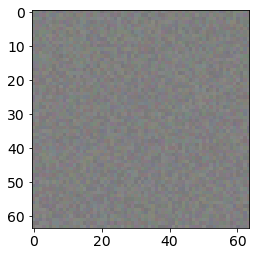

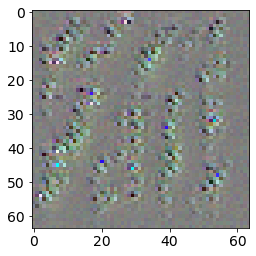

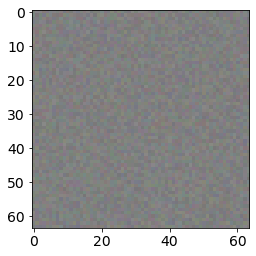

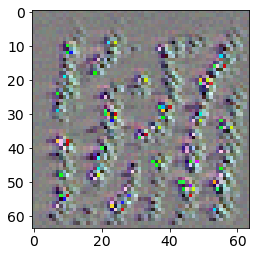

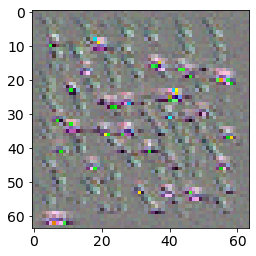

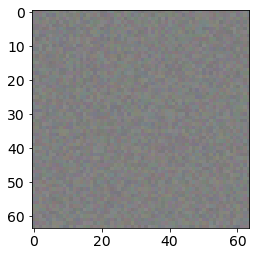

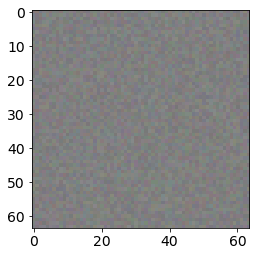

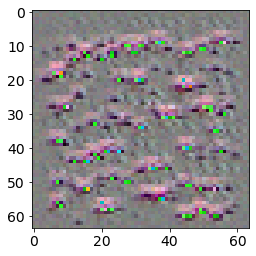

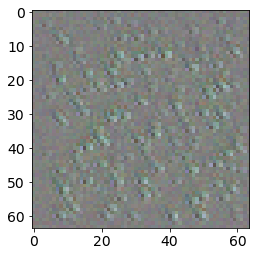

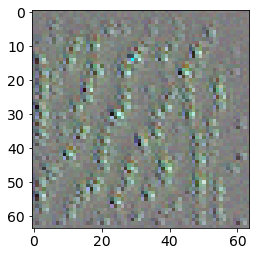

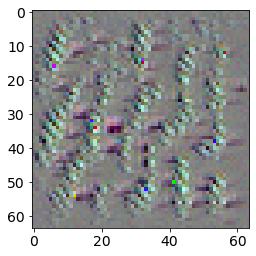

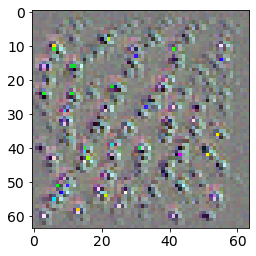

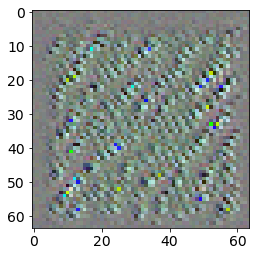

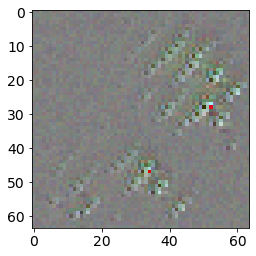

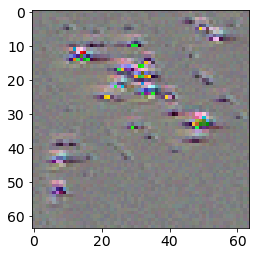

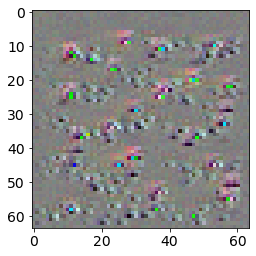

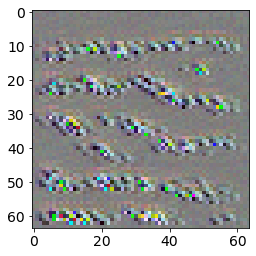

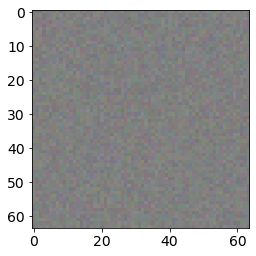

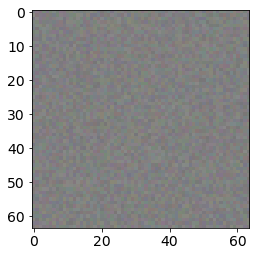

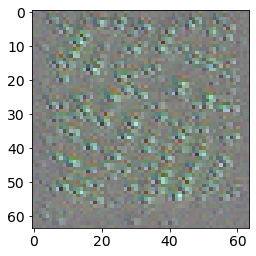

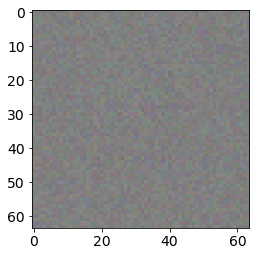

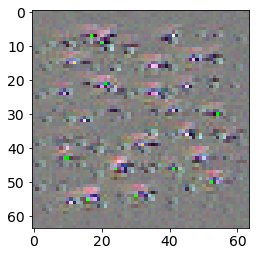

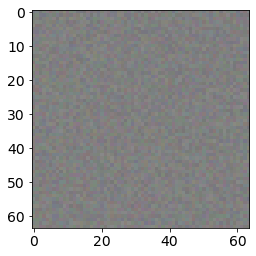

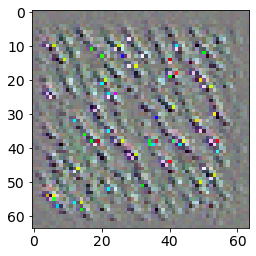

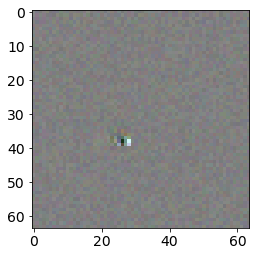

In [40]:
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8),size=size)
        filter_img=filter_img.numpy().astype(np.uint8)
       
        plt.figure(figsize=(4, 4))
        plt.imshow(filter_img[0])
        plt.show()


# **Problem 2**

1. **Perform testing.**
2. **Get the predicted class – show some correctly and not correctly predicted images of testing set as below.**
3. **Evaluate test results using confusion matrix, classification report**
>- precision, recall,
>- f1-score, support,
>- ROC/AUC and
>- Precision-Recall curves).

Except tables for this evaluation provide graphics of normalized confusion matrix as shown below, **ROC/AUC** curves as the one below.


### **Get the predicted class – show some correctly and not correctly predicted images of testing set as below.**

In [44]:
warnings.filterwarnings('ignore')

In [42]:
model1.metrics_names

['loss', 'accuracy']

In [45]:
predictions = model1.predict_classes(test_image_gen)

In [46]:
predictions

array([5, 4, 4, ..., 4, 4, 6])

In [47]:
predictions2 = model_2.predict_classes(test_image_gen)


In [48]:
predictions2

array([5, 0, 4, ..., 4, 4, 6])

In [49]:
predictions3= model_3.predict_classes(test_image_gen)

In [50]:
predictions3

array([6, 0, 0, ..., 4, 3, 6])

In [77]:

class_dict = dict([(value, key) for key, value in train_image_gen.class_indices.items()]) 

def ShowPredictedImages(NumPics,cls,model):
  plt.rcParams["figure.figsize"] = (20,20)
  Pics=[]
  for i in range(NumPics):
    img_tensor=imread(test_path+'/'+cls+'/'+os.listdir(test_path+'/'+cls)[i])
    if img_tensor.ndim ==3:
      img_tensor = np.expand_dims(img_tensor, axis=0)
      img_tensor = img_tensor/ 255.0
      Pics.append(img_tensor)

  print('The true class for the following pictures is: ', cls)
  print('The predicted classes are................') 
  fig = plt.figure()
  print(len(Pics))
  number_of_files = len(Pics)
  for i in range(number_of_files):
      a=fig.add_subplot(1,number_of_files,i+1)
      image=Pics[i][0]
      if model=='model1':
        num=model1.predict_classes(Pics[i])
      elif model=='model2':
        num=model_2.predict_classes(Pics[i])
      elif model=='model3':
        num=model_3.predict_classes(Pics[i])
      elif model=='EnsembleModel':
        num_=EnsembleModel.predict(Pics[i])
        num=np.argmax(num_,axis=1)
      plt.imshow(image,cmap='Greys_r')
      plt.title(class_dict[num[0]])
      plt.axis('off')



The above function takes to images and arguments
 
1.   **NumPics** : The number of images to display
2.   **Cls**   : The class you want to visualize the prediction for.

The function then, prints the number of specified images and the predicted class.



The true class for the following pictures is:  happy
The predicted classes are................
8


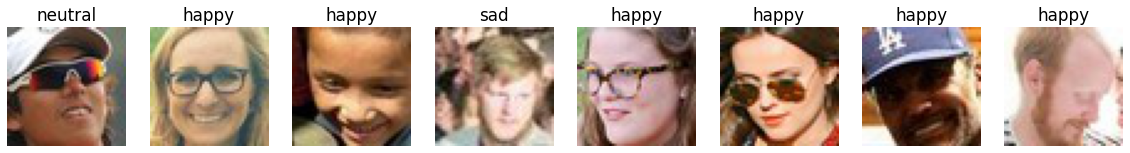

In [52]:
model='model1'
NumPics=12
cls='happy'
ShowPredictedImages(NumPics,cls, model)

The true class for the following pictures is:  happy
The predicted classes are................
8


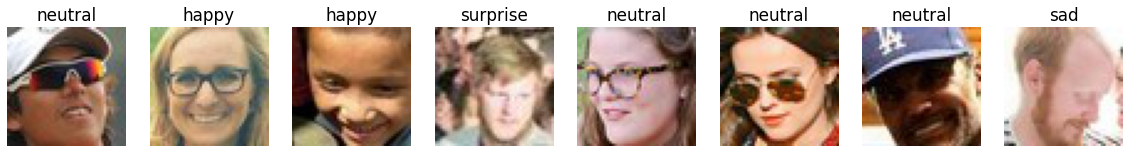

In [53]:
model='model2'
NumPics=12
cls='happy'
ShowPredictedImages(NumPics,cls, model)

The true class for the following pictures is:  happy
The predicted classes are................
8


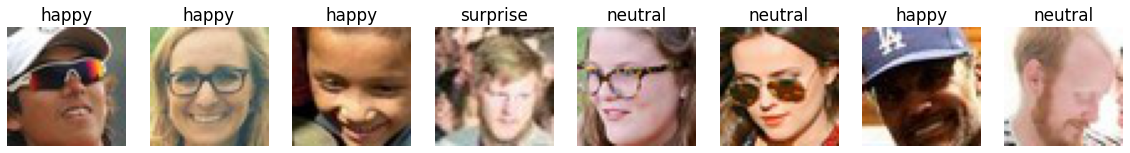

In [54]:
model='model3'
NumPics=12
cls='happy'
ShowPredictedImages(NumPics,cls, model)

# Analysis

# **Classification report**

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
True_classes=test_image_gen.classes
print(classification_report(True_classes,predictions))

              precision    recall  f1-score   support

           0       0.34      0.21      0.26      1041
           1       0.06      0.04      0.05       655
           2       0.03      0.00      0.00       691
           3       0.65      0.41      0.51      5459
           4       0.45      0.71      0.55      5858
           5       0.23      0.22      0.22      2177
           6       0.34      0.39      0.37      1475

    accuracy                           0.44     17356
   macro avg       0.30      0.28      0.28     17356
weighted avg       0.44      0.44      0.42     17356



In [57]:
print(classification_report(True_classes,predictions2))

              precision    recall  f1-score   support

           0       0.33      0.31      0.32      1041
           1       0.04      0.00      0.01       655
           2       0.00      0.00      0.00       691
           3       0.72      0.44      0.55      5459
           4       0.47      0.70      0.56      5858
           5       0.25      0.26      0.26      2177
           6       0.35      0.49      0.41      1475

    accuracy                           0.47     17356
   macro avg       0.31      0.32      0.30     17356
weighted avg       0.47      0.47      0.45     17356



In [58]:
print(classification_report(True_classes,predictions3))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1041
           1       0.14      0.01      0.02       655
           2       0.00      0.00      0.00       691
           3       0.79      0.46      0.58      5459
           4       0.49      0.80      0.61      5858
           5       0.36      0.20      0.26      2177
           6       0.36      0.64      0.46      1475

    accuracy                           0.52     17356
   macro avg       0.39      0.35      0.34     17356
weighted avg       0.53      0.52      0.49     17356



# **Confusion Matrix**

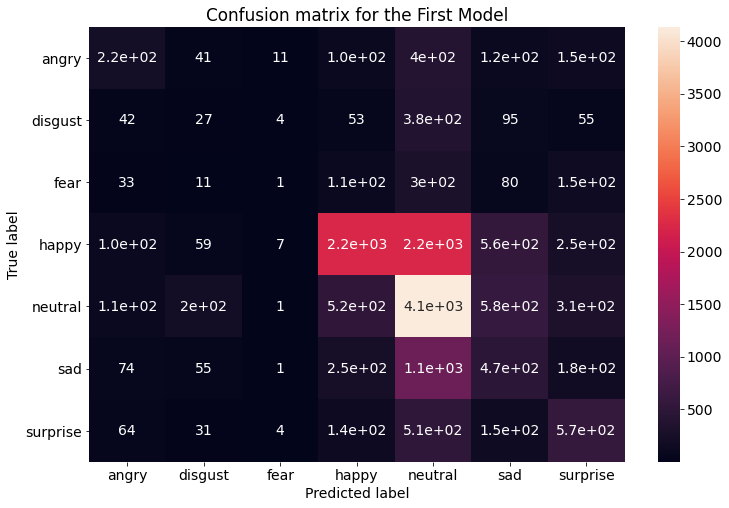

In [59]:

labels =['angry','disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise' ]
cm = confusion_matrix(True_classes,predictions) 
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True,xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix for the First Model' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.show()

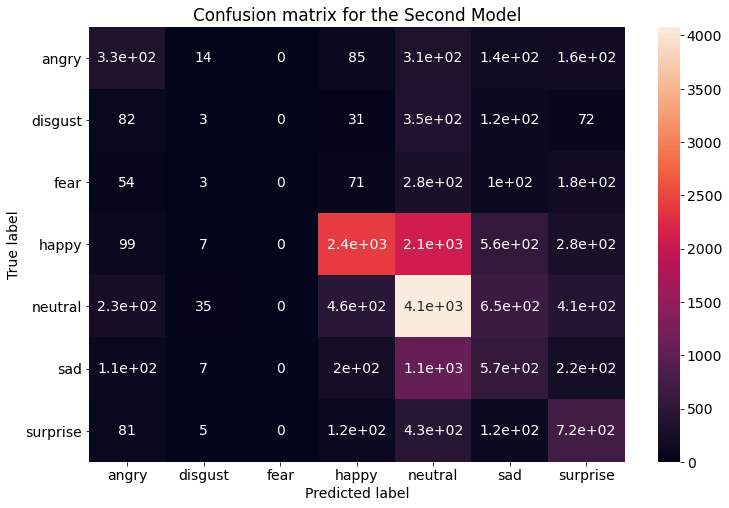

In [60]:
cm2 = confusion_matrix(True_classes,predictions2) 
cm2_df = pd.DataFrame(cm2)
plt.figure(figsize=(12,8))
sns.heatmap(cm2_df, annot=True,xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix for the Second Model' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.show()

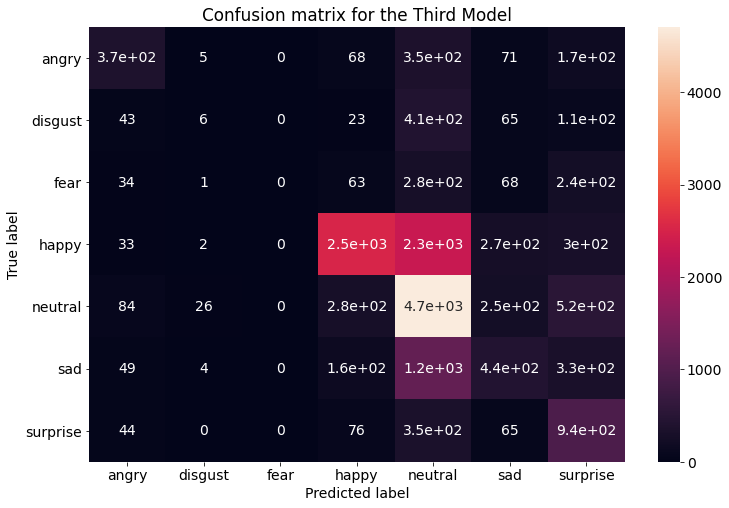

In [61]:
cm3 = confusion_matrix(True_classes,predictions3) 
cm3_df = pd.DataFrame(cm3)
plt.figure(figsize=(12,8))
sns.heatmap(cm3_df, annot=True,xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix for the Third Model' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.show()

# **Precision-Recall curves**

In [63]:
warnings.filterwarnings('ignore')
y_probas = model1.predict_proba(test_image_gen)
y2_probas = model_2.predict_proba(test_image_gen)
y3_probas = model_3.predict_proba(test_image_gen)


In [64]:
import scikitplot as skplt


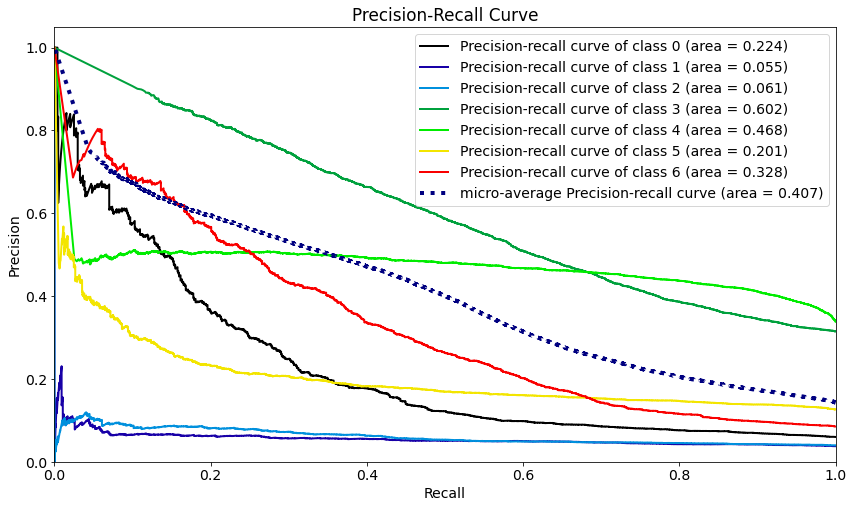

In [65]:
plt.rcParams["figure.figsize"] = (14,8)
skplt.metrics.plot_precision_recall(True_classes, y_probas)
plt.show()


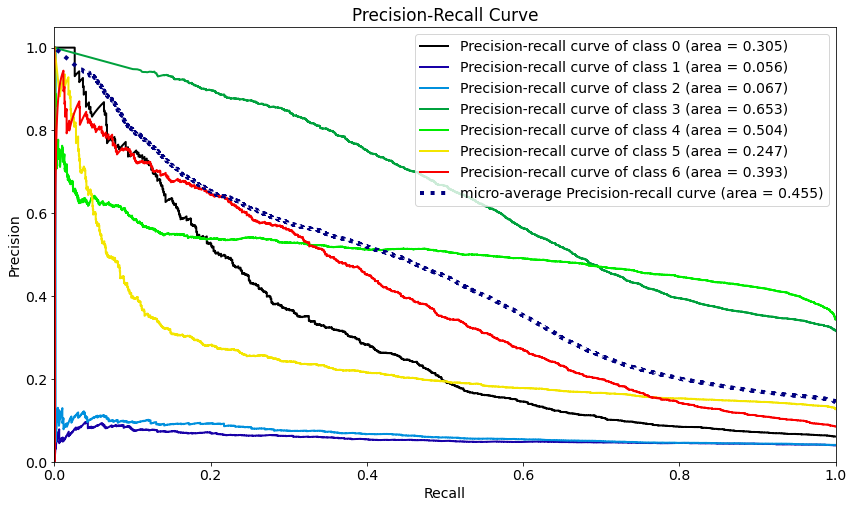

In [66]:
plt.rcParams["figure.figsize"] = (14,8)
skplt.metrics.plot_precision_recall(True_classes, y2_probas)
plt.show()


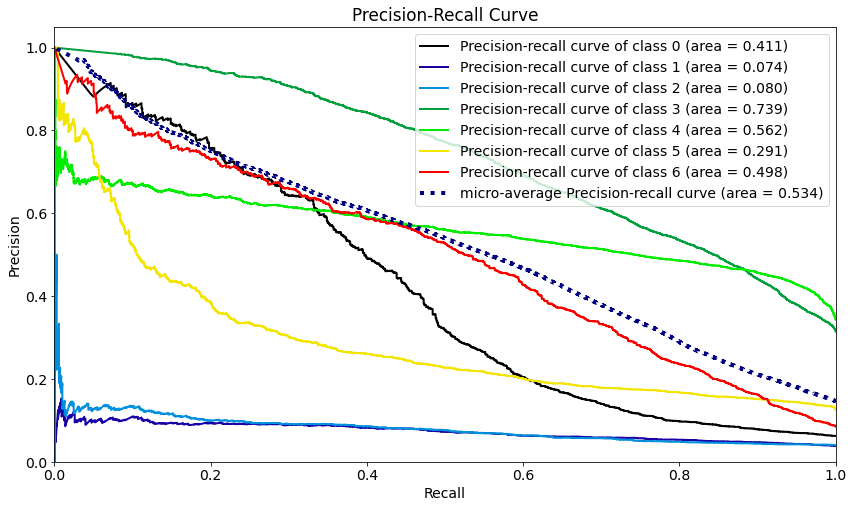

In [67]:
plt.rcParams["figure.figsize"] = (14,8)
skplt.metrics.plot_precision_recall(True_classes, y3_probas)
plt.show()


# **Plot the ROC/AUC curves**

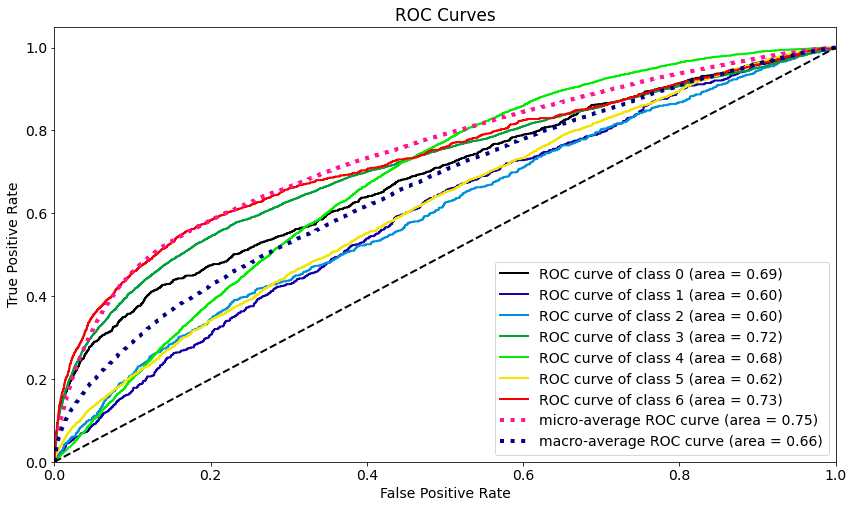

In [68]:
skplt.metrics.plot_roc(True_classes, y_probas)
plt.show()

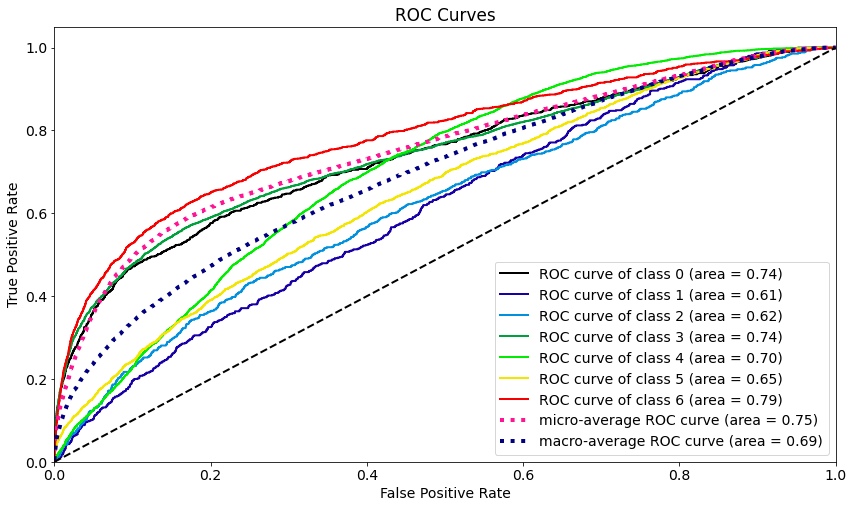

In [69]:
skplt.metrics.plot_roc(True_classes, y2_probas)
plt.show()

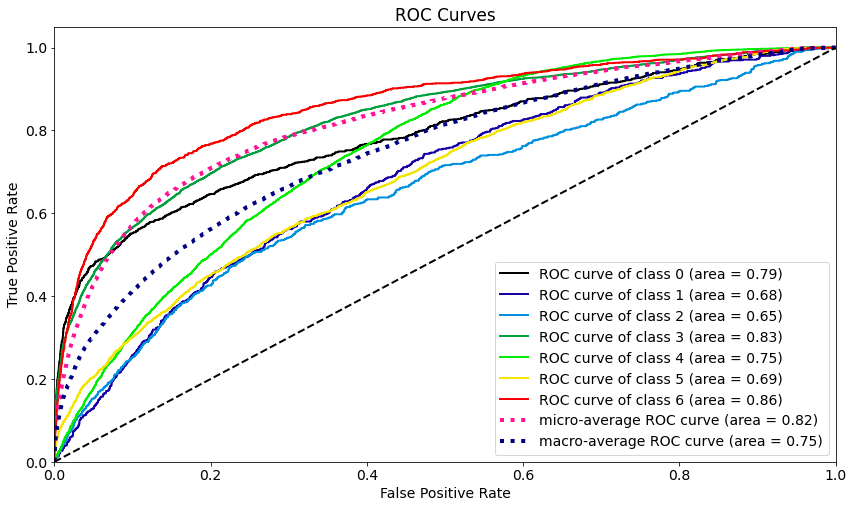

In [70]:
skplt.metrics.plot_roc(True_classes, y3_probas)
plt.show()

# **3) Implement any ENSEMBLING you want and present the results in a table as shown below as well as confusion matrix of your ensemble:**

# **1) we make a list of our 3 models**


In [71]:
models = [model1, model_2, model_3]

# **2) We define a function to ensemble models as below**

In [72]:
from keras.models import Model, Input
def ensembleModels(models, input_data):
    # collect outputs of models in a list
    yModels=[model(input_data) for model in models] 
    # averaging outputs
    yAvg=tf.keras.layers.average(yModels) 
    # build model from same input and avg output
    EnsembleModel = Model(inputs=input_data, outputs=yAvg,    name='ensemble')  
   
    return EnsembleModel

In [73]:
input_data = Input(shape=models[0].input_shape[1:]) # c*h*w
EnsembleModel = ensembleModels(models, input_data)
EnsembleModel.summary()

Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 7)            265447      input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 7)            176807      input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 7)            388679      input_1[0][0]                    
___________________________________________________________________________________________

# 3) Here we get the predictions using the **Ensemble Model** and store them into a list

In [74]:
EnsemblePredictions=EnsembleModel.predict(test_image_gen)

 ## 4) Here we use the **np.argmax** to convert the vector of probabilities into an array of predicted classes

In [75]:
EnsemblePredictions=np.argmax(EnsemblePredictions,axis=1)
EnsemblePredictions

array([5, 0, 4, ..., 4, 4, 6])

## Here we make predictions using the **Ensemble Model**



The true class for the following pictures is:  happy
The predicted classes are................
8


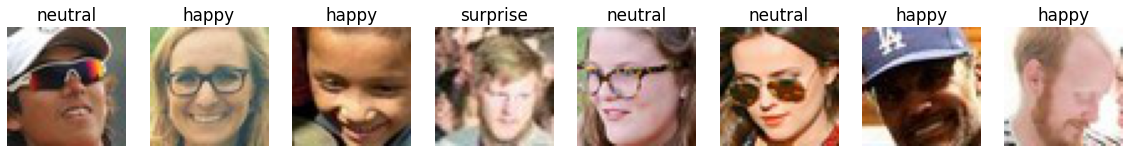

In [78]:
model='EnsembleModel'
NumPics=12
cls='happy'
ShowPredictedImages(NumPics,cls, model)


# 5) Printing the classification report for the the **Ensemble Model**



In [79]:
print(classification_report(True_classes,EnsemblePredictions))

              precision    recall  f1-score   support

           0       0.52      0.34      0.41      1041
           1       0.14      0.01      0.02       655
           2       0.00      0.00      0.00       691
           3       0.75      0.47      0.58      5459
           4       0.49      0.82      0.61      5858
           5       0.32      0.22      0.26      2177
           6       0.43      0.54      0.48      1475

    accuracy                           0.52     17356
   macro avg       0.38      0.34      0.34     17356
weighted avg       0.51      0.52      0.49     17356



# 6) Plotting the **confusion matrix** for the **Ensemble Model**

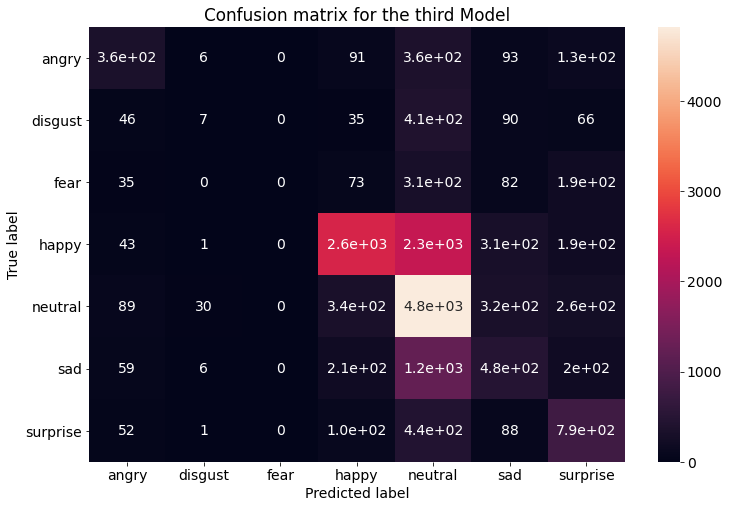

In [80]:
cm3 = confusion_matrix(True_classes,EnsemblePredictions) 
cm3_df = pd.DataFrame(cm3)
plt.figure(figsize=(12,8))
sns.heatmap(cm3_df, annot=True,xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix for the third Model' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
plt.show()